In [1]:
from matcalc.relaxation import RelaxCalc
from matcalc.phonon import PhononCalc
from matcalc.eos import EOSCalc
from matcalc.elasticity import ElasticityCalc
from matcalc.util import get_universal_calculator
from datetime import datetime

from pymatgen.ext.matproj import MPRester

In [2]:
mpr = MPRester()

/Users/shyue/miniconda3/envs/mavrl/lib/python3.9/site-packages/mp_api/client/mprester.py:182: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(


In [3]:
mpdata = mpr.materials._search(nelements=2, fields=["material_id", "structure"])

Retrieving MaterialsDoc documents:   0%|          | 0/20627 [00:00<?, ?it/s]

In [4]:
up = get_universal_calculator("M3GNet")

/Users/shyue/repos/matgl/matgl/utils/io.py:125: UserWarning: Incompatible model version detected! The code will continue to load the model but it is recommended that you provide a path to an updated model, increment your @model_version in model.json if you are confident that the changes are not problematic, or clear your ~/.matgl cache using `python -c "import matgl; matgl.clear_cache()"`
  _check_ver(cls_, v)  # Check version of any subclasses too.


In [5]:
fmax = 0.01
# Note that the rest of the parameters require a more stringent fmax criterion.
# The general principle is to do a relaxation first and just reuse the same structure.

prop_calcs = [
    ("relax", RelaxCalc(up, fmax=fmax)),
    ("elastic", ElasticityCalc(up, fmax=fmax, relax_structure=False)),
    ("eos", EOSCalc(up, fmax=fmax, relax_structure=False)),
    ("phonon", PhononCalc(up, fmax=fmax, relax_structure=False)),
]

In [6]:
data = []

for i, d in enumerate(mpdata):
    s = d.structure
    dd = {"mid": d.material_id, "composition": s.composition.formula, "nsites": len(s)}
    properties = {}
    for name, c in prop_calcs:
        starttime = datetime.now()
        properties[name] = c.calc(s)
        endtime = datetime.now()
        if name == "relax":
            # Replace the structure with the one from relaxation for other property computations.
            s = properties[name]["final_structure"]
        dd[f"time_{name}"] = (endtime - starttime).total_seconds()
    dd["properties"] = properties
    data.append(dd)
    if i == 20:
        # Here we just do a sampling of 20 structures.
        break

/Users/shyue/miniconda3/envs/mavrl/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [7]:
import pandas as pd

df = pd.DataFrame(data)

In [8]:
df

,mid,composition,nsites,time_relax,time_elastic,time_eos,time_phonon,properties
0,mp-1106268,Pr14 Pd6,20,62.569973,0.388854,16.062428,21.788832,{'relax': {'final_structure': [[-5.19303374 2...
1,mp-974315,Ru2 I2,4,1.416487,0.205097,4.295082,0.839284,{'relax': {'final_structure': [[ 1.83881118 -1...
2,mp-1206714,Al2 Sn1,3,0.470579,0.117568,0.229159,0.251379,{'relax': {'final_structure': [[1.59917846 1.5...
3,mp-30339,Er1 Ag2,3,0.732216,0.187762,2.538878,0.458349,{'relax': {'final_structure': [[4.48158802e-07...
4,mp-696,Si4 Pt4,8,14.738731,0.417027,23.731089,8.059876,{'relax': {'final_structure': [[0.88065869 3.9...
5,mp-866222,Ac2 Si6,8,22.017402,0.237975,5.265661,2.303969,{'relax': {'final_structure': [[-2.05389424e-0...
6,mp-11422,Gd1 Hg1,2,0.287373,0.109842,0.213693,0.168733,{'relax': {'final_structure': [[5.55001412e-20...
7,mp-21238,Th4 Si4,8,5.828830,0.271988,9.576225,1.018305,{'relax': {'final_structure': [[1.08998567 0.7...
8,mp-1215363,Zr4 Pd1,5,1.707482,0.200783,7.705117,1.222322,{'relax': {'final_structure': [[ 3.93732368e-0...
9,mp-1212658,Ga1 C6,7,2.543793,0.235257,4.211858,1.364123,{'relax': {'final_structure': [[-9.88259495e-0...


<Axes: xlabel='nsites', ylabel='time_relax'>

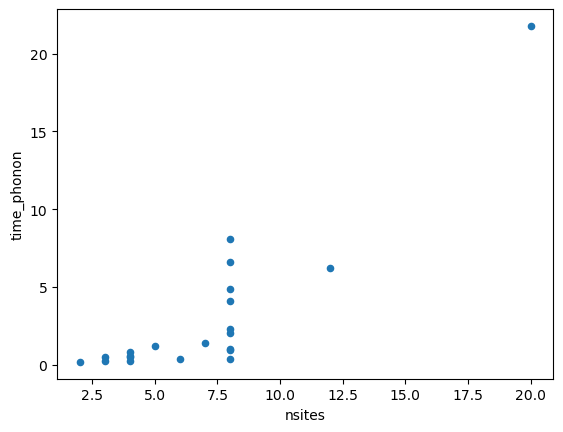

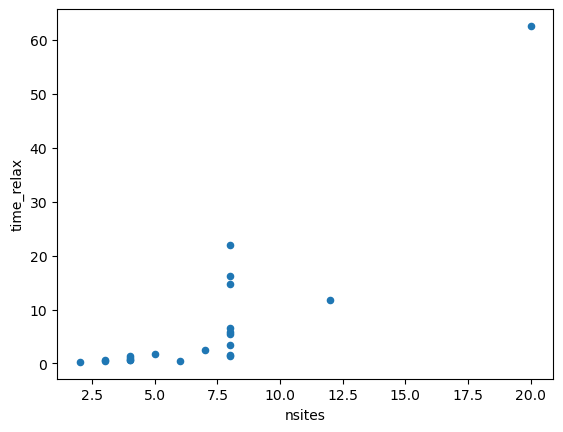

In [9]:
df.plot(x="nsites", y="time_phonon", kind="scatter")
df.plot(x="nsites", y="time_relax", kind="scatter")